## 导入相关库

In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
"""
sns 相关设置
@return:
"""
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('talk')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Seaborn中文显示问题并调整字体大小
sns.set(font='SimHei')

In [2]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
data = pd.read_csv('../data/train.csv')
data = reduce_mem_usage(data)

Memory usage of dataframe is 6720080.00 MB
Memory usage after optimization is: 3710800.00 MB
Decreased by 44.8%


In [4]:
data.head().append(data.tail())

,id,XINGBIE,CSNY,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,...,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL,label
0,train_0,1,1038672000,90,90,999,0,99,150,12,...,1,3223.514893,801.309998,837.000000,312.00,312.00,175237,154112.937500,2.707031,0
1,train_1,2,504892800,90,90,999,0,99,110,0,...,1,18055.195312,53213.218750,1065.199951,796.00,796.00,300237,298252.937500,2.978516,0
2,train_2,1,736185600,90,90,999,0,99,150,9,...,1,27426.599609,13963.139648,7230.020020,1444.00,1444.00,150237,147339.125000,2.707031,0
3,train_3,1,428515200,90,90,999,0,99,150,7,...,1,111871.132812,99701.265625,2271.294922,1417.00,1417.00,350237,300653.781250,2.707031,0
4,train_4,2,544204800,90,90,999,0,99,900,14,...,1,237.000000,11028.875000,35.779999,325.50,325.50,150237,145185.015625,2.707031,0
39995,train_39995,1,573148800,90,90,999,0,99,110,16,...,1,82865.578125,65304.371094,4026.600098,591.00,591.00,150237,117816.679688,2.707031,0
39996,train_39996,2,57772800,90,90,999,0,99,110,14,...,1,32811.585938,27065.150391,1603.560059,407.75,407.75,300237,267615.062500,2.978516,0
39997,train_39997,2,673023600,90,90,999,0,99,143,9,...,1,8875.695312,1309.890015,3185.800049,605.50,605.50,175237,237.000000,2.707031,0
39998,train_39998,1,536428800,90,90,999,0,99,150,6,...,1,2079.399902,252.875000,1614.489990,467.25,467.25,125237,113068.898438,2.707031,1
39999,train_39999,1,31507200,90,90,999,0,99,110,14,...,1,26210.634766,27266.080078,-4994.609863,800.50,800.50,300237,287737.000000,2.978516,0


In [5]:
y_train = data['label']
X_train = data.drop(['id','label'],axis = 1)


In [ ]:
# from sklearn.model_selection import KFold
# # 分离数据集，方便进行交叉验证
# X_train = data.loc[data['sample']=='train', :].drop(['id','issueDate','isDefault', 'sample'], axis=1)
# X_test = data.loc[data['sample']=='test', :].drop(['id','issueDate','isDefault', 'sample'], axis=1)
# y_train = data.loc[data['sample']=='train', 'isDefault']

# # 5折交叉验证
# folds = 5
# seed = 2020
# kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

In [7]:
"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'learning_rate': 0.1,
            'metric': 'auc',
            'min_child_weight': 1e-3,
            'num_leaves': 31,
            'max_depth': -1,
            'reg_lambda': 0,
            'reg_alpha': 0,
            'feature_fraction': 1,
            'bagging_fraction': 1,
            'bagging_freq': 0,
            'seed': 2020,
            'nthread': 8,
            'silent': True,
            'verbose': -1,
}

"""使用训练集数据进行模型训练"""
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

ModuleNotFoundError: No module named 'lightgbm'

未调参前lightgbm单模型在验证集上的AUC：0.9322698449461976


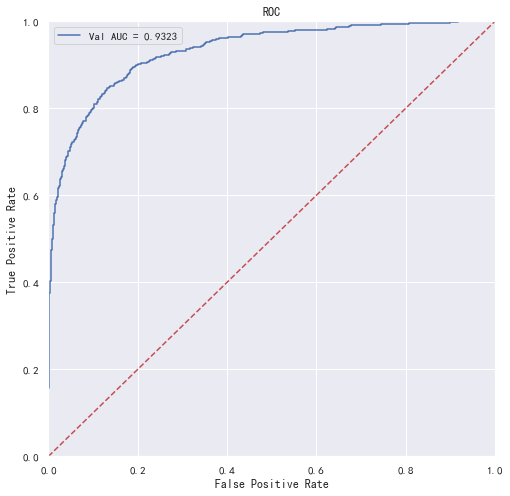

In [16]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

"""预测并计算roc的相关指标"""
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

In [ ]:
# import lightgbm as lgb
# """使用lightgbm 5折交叉验证进行建模预测"""
# cv_scores = []
# for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
#     print('************************************ {} ************************************'.format(str(i+1)))
#     X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
#     train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
#     valid_matrix = lgb.Dataset(X_val, label=y_val)

#     params = {
#                 'boosting_type': 'gbdt',
#                 'objective': 'binary',
#                 'learning_rate': 0.1,
#                 'metric': 'auc',
        
#                 'min_child_weight': 1e-3,
#                 'num_leaves': 31,
#                 'max_depth': -1,
#                 'reg_lambda': 0,
#                 'reg_alpha': 0,
#                 'feature_fraction': 1,
#                 'bagging_fraction': 1,
#                 'bagging_freq': 0,
#                 'seed': 2020,
#                 'nthread': 8,
#                 'silent': True,
#                 'verbose': -1,
#     }
    
#     model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
#     val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
#     cv_scores.append(roc_auc_score(y_val, val_pred))
#     print(cv_scores)

# print("lgb_scotrainre_list:{}".format(cv_scores))
# print("lgb_score_mean:{}".format(np.mean(cv_scores)))
# print("lgb_score_std:{}".format(np.std(cv_scores)))

In [18]:
data_test = pd.read_csv('../data/test.csv')

In [20]:
X_test = data_test.drop(['id'],axis = 1)

In [33]:
test_pre_lgb = model.predict(X_test, num_iteration=model.best_iteration)

In [34]:
test_pre_lgb[:100]

array([5.64448169e-03, 8.38697587e-03, 2.26810754e-02, 6.56783064e-03,
       8.71760294e-02, 5.21839767e-03, 5.40508785e-03, 3.88062163e-03,
       1.36885246e-01, 5.29314121e-03, 9.55219166e-02, 1.34120210e-01,
       5.05383155e-02, 3.49431715e-02, 9.76194642e-03, 1.04115718e-01,
       4.25783275e-02, 2.65886342e-02, 2.33987726e-02, 4.15312044e-03,
       5.56111441e-02, 4.20021112e-02, 5.34437844e-01, 5.81020962e-03,
       2.74165920e-02, 2.12096214e-02, 6.18840313e-03, 4.71858971e-03,
       6.54786416e-03, 2.00918580e-01, 1.00758579e-02, 9.91545124e-01,
       5.63040918e-02, 9.78917837e-02, 2.66291125e-02, 7.98729550e-03,
       1.70723375e-03, 2.01535155e-03, 1.55806250e-01, 9.81181168e-01,
       1.39698557e-02, 3.08122809e-02, 1.91788712e-02, 4.79849141e-01,
       8.15497656e-03, 4.47149062e-02, 6.83882151e-03, 6.38310757e-01,
       4.91487920e-02, 3.94843256e-02, 1.85204174e-02, 2.89709195e-02,
       2.71303246e-03, 1.52855812e-02, 9.89023912e-01, 9.27583677e-03,
      

In [31]:
# check = test_pre_lgb
# check[check>0.5] = 1
# check[check<0.5] = 0
# print(sum(check))

1196.0


In [54]:
save_path = '../results/'
df = pd.DataFrame(test_pre_lgb)
df.to_csv(save_path + 'predict_result.csv',index=False)

ModuleNotFoundError: No module named 'pandas.io.formats.csvs'

In [52]:
import pandas

In [55]:
df.head()

ModuleNotFoundError: No module named 'pandas.io.formats.html'

          0
0  0.005644
1  0.008387
2  0.022681
3  0.006568
4  0.087176